In [40]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt



<Axes: >

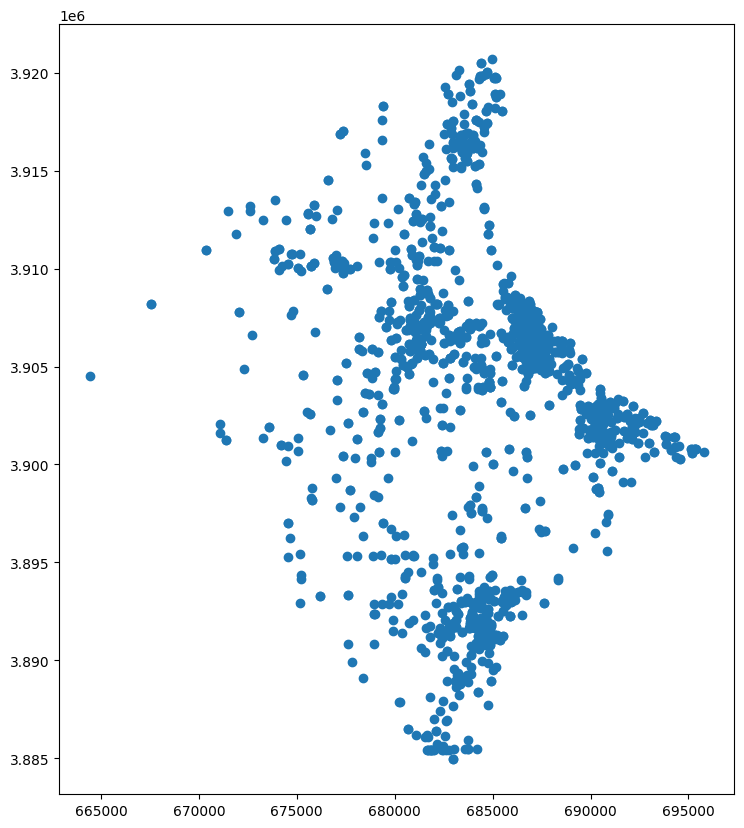

In [41]:
puit=gpd.read_file("puits chebba.shp")
puit.plot(figsize=(10,10))

In [42]:
puit.sample(10)

,N,N_ORDRE,ANN,NON_PUI,RS_GL,POINT_X,POINT_Y,geometry
727,2787,805,1996,MHAMED BEN SASSI ABDENNEBI,7,678709.689987,3.903575e+06,POINT (678709.690 3903574.820)
15,3542,157,1990,ALI BEN OTHMAN,4,683008.229987,3.885452e+06,POINT (683008.230 3885451.910)
1423,500,529,1988,ALI BEN AMEUR BEN ALI KHEMIRI,1,685991.239987,3.907972e+06,POINT (685991.240 3907972.290)
767,3694,739,0,HASSEN SLIMANE,0,689262.889987,3.904245e+06,POINT (689262.890 3904245.310)
639,2724,11,0,CHAZAIEL B SALEM,5,692497.869987,3.902361e+06,POINT (692497.870 3902360.730)
1131,3184,581,0,KHALIFA BELGACEM,4,683156.069987,3.906472e+06,POINT (683156.070 3906471.560)
412,1924,367,1986,HOUCINE BEN HASSEN BACCOUCHE,4,687424.329987,3.898115e+06,POINT (687424.330 3898114.700)
1209,3185,582,0,EL HECHMI KILANI,5,683312.779987,3.906819e+06,POINT (683312.780 3906818.740)
1125,1980,878,1999,JAMILA BENT SAMI,7,685531.049987,3.906465e+06,POINT (685531.050 3906464.720)
768,2988,364,1987,HECHMI FREDJ,2,686723.509987,3.904248e+06,POINT (686723.510 3904247.800)


<Axes: >

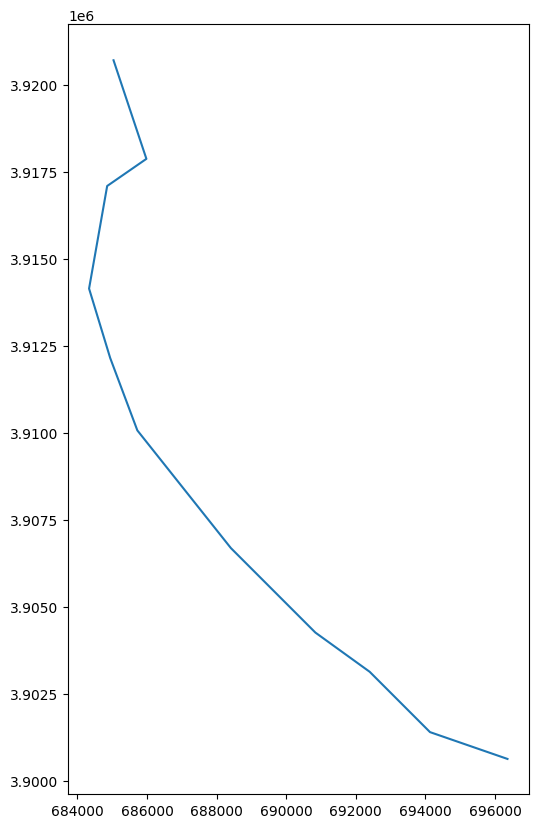

In [43]:
cote=gpd.read_file('Cote.shp')
cote.plot(figsize=(10,10))

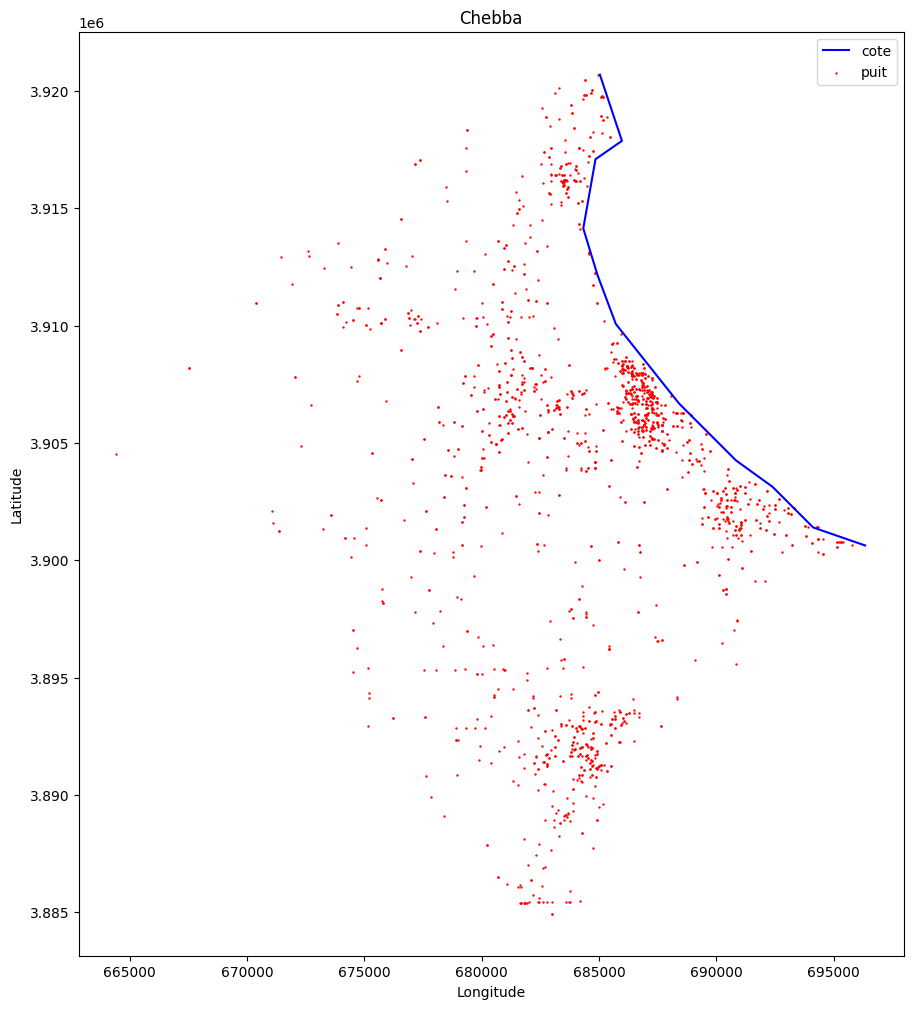

In [44]:
fig, ax = plt.subplots(figsize=(12, 12))
cote.plot(ax=ax, color='blue', label='cote')
puit.plot(ax=ax, color='red',markersize=0.5, label='puit')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Chebba')
ax.legend()
plt.show()


In [45]:
puit.crs = 'EPSG:32632'
cote = cote.to_crs(puit.crs)


In [46]:
puit_near_coastline=gpd.sjoin(cote,puit,how='left',op='intersects')

c:\Users\sayeh omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [47]:
buffer_distance = 5*1000
coast_buffer = cote.geometry.buffer(buffer_distance)
coast_buffer_gdf = gpd.GeoDataFrame(geometry=coast_buffer, crs=cote.crs)


In [48]:
poi_within_coast = puit[puit.geometry.within(coast_buffer_gdf.unary_union)]


In [49]:
poi_within_coast

,N,N_ORDRE,ANN,NON_PUI,RS_GL,POINT_X,POINT_Y,geometry
420,588,613,1989,ALI BEN MED BEN SALAH HALOU,8,690411.049987,3.898577e+06,POINT (690411.050 3898576.700)
421,3218,613,0,ALI HALOUAS,8,690411.049987,3.898577e+06,POINT (690411.050 3898576.700)
424,2525,847,1998,MED BEN HEDI MERAOUI,13,690280.329987,3.898729e+06,POINT (690280.330 3898729.300)
425,4666,847,1997,MOHAMED B.HEDI EL MERAOUI,1,690280.329987,3.898729e+06,POINT (690280.330 3898729.300)
426,1610,872,1999,HASSEN BEN ALI JRIBI,10,690406.839987,3.898776e+06,POINT (690406.840 3898776.360)
...,...,...,...,...,...,...,...,...
1836,3572,478,0,EZEDDINE MSAAD,6,684724.059987,3.920031e+06,POINT (684724.060 3920030.700)
1837,1462,1499,200,HABIB BEN MOHAMED BEN HABIB BEN ALYA,7,683286.239987,3.920145e+06,POINT (683286.240 3920145.440)
1838,2231,151,1981,MAHMOUD BEN ALI SGANNI,3,684387.759987,3.920479e+06,POINT (684387.760 3920478.750)
1839,1065,151,1981,MOHAMED ZGARNI,3,684387.759987,3.920479e+06,POINT (684387.760 3920478.750)


C:\Users\sayeh omar\AppData\Local\Temp\ipykernel_20028\1883839413.py:21: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


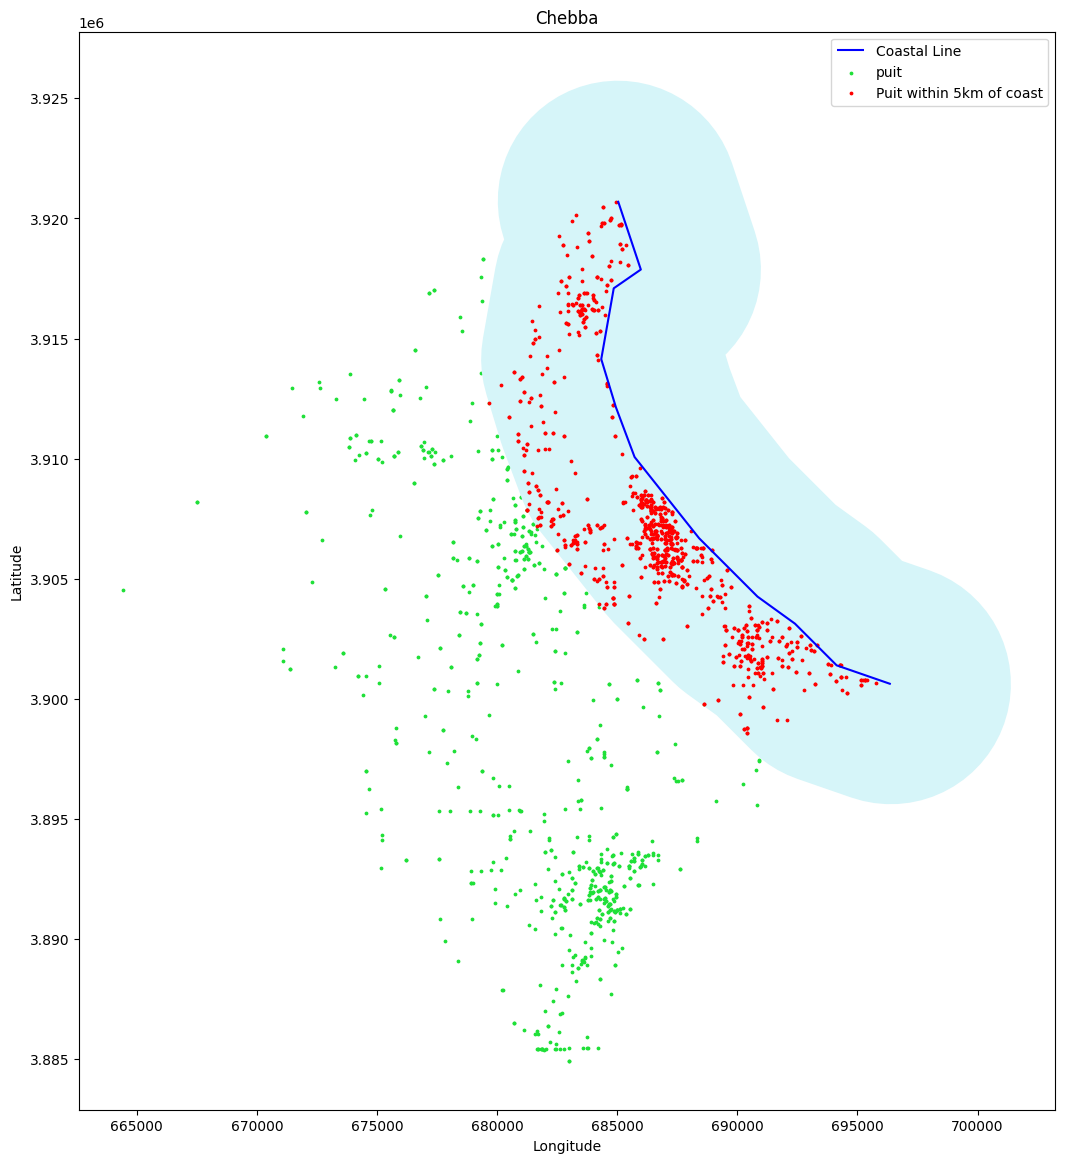

In [50]:

fig, ax = plt.subplots(figsize=(18, 14))

# Plot the coast and the Puit
cote.plot(ax=ax, color='blue', label='Coastal Line')
puit.plot(ax=ax, color='#1fe038',markersize=3, label='puit')
# Plot the buffer around the coast 
coast_buffer_gdf.plot(ax=ax, color='#d6f5f9', label='Coastal Buffer zone')


# Plot the selected POI points
poi_within_coast.plot(ax=ax, marker='o', color='red', markersize=3, label='Puit within 5km of coast')




ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Chebba')


plt.legend()


plt.show()
